best: 65.0
avg: 44.390625
-----------------------
best: 61.0
avg: 44.375
-----------------------
best: 57.5
avg: 42.28125
-----------------------
best: 57.5
avg: 44.4375
-----------------------
best: 61.5
avg: 47.203125
-----------------------
best: 60.5
avg: 44.203125
-----------------------
best: 59.0
avg: 46.359375
-----------------------
best: 58.0
avg: 45.984375
-----------------------
best: 64.5
avg: 44.9375
-----------------------
best: 62.5
avg: 45.84375
-----------------------
[64.5, 65.0, 61.0, 57.5, 57.5, 61.5, 60.5, 59.0, 58.0, 64.5, 62.5]
[46.0, 44.390625, 44.375, 42.28125, 44.4375, 47.203125, 44.203125, 46.359375, 45.984375, 44.9375, 45.84375]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


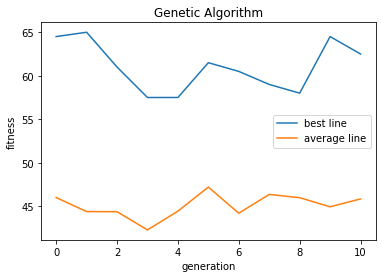

In [4]:
from random import random, randrange, shuffle
import pandas
import csv
from numpy import mean
import matplotlib.pyplot as plt
import math



def mutate(child):
    mutate1 = randrange(0,24) 
    mutate2 = randrange(0,24) 
    while mutate2 == mutate1:
        mutate2 = randrange(0,24)
    if mutate1 != 0:
        if child[mutate1] == "0":
            child = child[0:mutate1] + '1' + child[mutate1+1:]
        else:
            child = child[0:mutate1] + '0' + child[mutate1+1:]
    else:
        if child[mutate1] == "0":
            child = '1' + child[1:]
        else:
            child = '0' + child[1:]
    
    if mutate2 != 0:
        if child[mutate2] == "0":
            child = child[0:mutate2] + '1' + child[mutate2+1:]
        else:
            child = child[0:mutate2] + '0' + child[mutate2+1:]
    else:
        if child[mutate2] == "0":
            child = '1' + child[1:]
        else:
            child = '0' + child[1:]
    return child        

def crossover(chromosome):
    for i in range(0,len(chromosome),2):
        parent1 = chromosome[i].chromosome
        parent2 = chromosome[i+1].chromosome
#         print("parent 1 " + parent1)
#         print("parent 2 " + parent2)
        child1 = parent1[0:4] + parent2[4:8] + parent1[8:12] + parent2[12:16] + parent1[16:20] + parent2[20:24]
        child2 = parent2[0:4] + parent1[4:8] + parent2[8:12] + parent1[12:16] + parent2[16:20] + parent1[20:24]
#         print("child 1 " + child1)
#         print("child 2 " + child2)
        child1 = mutate(child1)
        child2 = mutate(child2)
#         print("child 1 after mutate " + child1)
#         print("child 2 after mutate " + child2)
        chromosome[i].chromosome = child1
        chromosome[i].chromosome = child2
    return chromosome
    
def create_chromosome(data, bestLn, avgLn) :
    class Chromosome():
        chromosome =''
        fitness = 0
    temp = Chromosome()
    best = 0
    chromosome = []
    sumFitness = 0
    for i in range(32):
        gene = str(randrange(0,2))
        for j in range(23):
            gene = gene + str(randrange(0,2))
        temp.chromosome = gene
        mealData1 = accessData(data ,temp.chromosome[0:8])
        mealData2 = accessData(data ,temp.chromosome[8:16])
        mealData3 = accessData(data ,temp.chromosome[16:])
        while not checkCons(mealData1, mealData2, mealData3):
            temp.chromosome = mutate(temp.chromosome)
            mealData1 = accessData(data ,temp.chromosome[0:8])
            mealData2 = accessData(data ,temp.chromosome[8:16])
            mealData3 = accessData(data ,temp.chromosome[16:])
        temp.fitness = fitnessFn(mealData1, mealData2, mealData3)
        sumFitness += temp.fitness
        if best < temp.fitness:
            best = temp.fitness   
        chromosome.append(temp)
        temp = Chromosome()
        gene = ''
    bestLn.append(best)
    avgLn.append(sumFitness/len(chromosome))
    return chromosome
        
def fitnessFn(meal1, meal2, meal3):
    totalProtein = meal1['protein'] + meal2['protein'] + meal3['protein']
#     totalCalories = meal1['calories'] + meal2['calories'] + meal3['calories']
#     return 0.5*totalProtein + 0.5*totalCalories
    return 0.5*totalProtein 
    
def breeding(data, chromosome, bestLn, avgLn):
    sumFitness = 0
    best = 0
    chromosome = sorted(chromosome, key=lambda x: x.fitness, reverse=True)
    chromosome = crossover(chromosome)
    for cms in chromosome:
        mealData1 = accessData(data ,cms.chromosome[0:8])
        mealData2 = accessData(data ,cms.chromosome[8:16])
        mealData3 = accessData(data ,cms.chromosome[16:])
        while not checkCons(mealData1, mealData2, mealData3):
            cms.chromosome = mutate(cms.chromosome)
            mealData1 = accessData(data ,cms.chromosome[0:8])
            mealData2 = accessData(data ,cms.chromosome[8:16])
            mealData3 = accessData(data ,cms.chromosome[16:])
        cms.fitness = fitnessFn(mealData1, mealData2, mealData3)
        sumFitness += cms.fitness
        if best < cms.fitness:
            best = cms.fitness
    bestLn.append(best)
    avgLn.append(sumFitness/len(chromosome))
    print('best: ' + str(best))
    print('avg: ' + str(sumFitness/len(chromosome)))
    print('-----------------------')
        

def checkCons(foodData1,foodData2,foodData3) :
    if(foodData1['sugar'] + foodData2['sugar'] + foodData3['sugar'] >= 24 and foodData1['sugar'] + foodData2['sugar'] + foodData3['sugar'] <= 50) :
#         if(foodData1['protein'] + foodData2['protein'] + foodData3['protein'] >= 75 and foodData1['protein'] + foodData2['protein'] + foodData3['protein'] <= 175) :
#             if(foodData1['calories'] + foodData2['calories'] + foodData3['calories'] >= 1500 and foodData1['calories'] + foodData2['calories'] + foodData3['calories'] <= 2500) :
                if(foodData1['carb'] + foodData2['carb'] + foodData3['carb']  >= 150 and foodData1['carb'] + foodData2['carb'] + foodData3['carb'] <= 200) :
                    if(foodData1['fat'] + foodData2['fat'] + foodData3['fat'] >= 50 and foodData1['fat'] + foodData2['fat'] + foodData3['fat'] <= 70) :
                        return True
    return False
    
    
# def findBestAndAve(chromosome):
#     for i in chromosome:
#         chromosome[i] = fitnessFn(chromosome[i])
#     chromosome.sort(reverse = True)
#     for j in chromosome:
#         crossover(chromosome[j],chromosome[j+1])

# input name of dataframe and 8-bit chromosome
def accessData(df, chromosome) :
    menuNumber = 0
    for i in range(0, len(chromosome)):
        temp = int(chromosome[i])*(2**(len(chromosome)-i-1))
        menuNumber += temp
    sugar = df.Sugar[menuNumber]
    protein = df.Protein[menuNumber]
    calories = df.Calories[menuNumber]
    carb = df.Carbohydrates[menuNumber]
    fat = df.Total_Fat[menuNumber]
    return {"sugar": sugar, "protein": protein, "calories": calories, "carb": carb, "fat": fat}

chromosome = []
bestLn = []
avgLn = []
di = r"sampling_Filtered_Nutriton.csv"
article_read = pandas.read_csv(di, encoding='latin1')
article_read = article_read.sort_values(['Protein','Calories'], ascending=[False,False])
chromosome = create_chromosome(article_read, bestLn, avgLn)
gen = 0
for i in range(10):
    breeding(article_read, chromosome, bestLn, avgLn)
    gen = gen + 1
#     print(bestLn)
#     print(avgLn)
gen = gen + 1
genLn = list(range(0,gen))
print(bestLn)
print(avgLn)
print(genLn)
plt.plot(genLn, bestLn, label = "best line") 
plt.plot(genLn, avgLn, label = "average line") 
plt.xlabel('generation') 
plt.ylabel('fitness') 
plt.title('Genetic Algorithm') 
plt.legend() 
plt.show() 








best: 967.5
avg: 853.921875
bad chromosome: 35
-----------------------
1
best: 967.5
avg: 854.5
bad chromosome: 86
-----------------------
2
best: 967.5
avg: 857.640625
bad chromosome: 127
-----------------------
3
best: 967.5
avg: 861.5
bad chromosome: 355
-----------------------
4
best: 967.5
avg: 861.953125
bad chromosome: 406
-----------------------
5
best: 967.5
avg: 862.53125
bad chromosome: 450
-----------------------
6
best: 967.5
avg: 862.703125
bad chromosome: 495
-----------------------
7
best: 967.5
avg: 864.015625
bad chromosome: 510
-----------------------
8
best: 967.5
avg: 863.125
bad chromosome: 686
-----------------------
9
best: 967.5
avg: 865.8125
bad chromosome: 695
-----------------------
10
best: 967.5
avg: 869.171875
bad chromosome: 907
-----------------------
11
best: 967.5
avg: 870.6875
bad chromosome: 913
-----------------------
12
best: 967.5
avg: 872.078125
bad chromosome: 974
-----------------------
13
best: 967.5
avg: 874.015625
bad chromosome: 1036
-----

best: 1048.5
avg: 946.578125
bad chromosome: 9411
-----------------------
112
best: 1048.5
avg: 943.671875
bad chromosome: 9449
-----------------------
113
best: 1048.5
avg: 944.234375
bad chromosome: 9526
-----------------------
114
best: 1048.5
avg: 944.046875
bad chromosome: 9546
-----------------------
115
best: 1048.5
avg: 944.171875
bad chromosome: 9743
-----------------------
116
detect bad chr!
best: 1048.5
avg: 946.5625
bad chromosome: 9878
-----------------------
117
best: 1048.5
avg: 945.859375
bad chromosome: 9961
-----------------------
118
best: 1048.5
avg: 943.265625
bad chromosome: 9985
-----------------------
119
best: 1048.5
avg: 944.203125
bad chromosome: 10080
-----------------------
120
best: 1048.5
avg: 944.515625
bad chromosome: 10101
-----------------------
121
best: 1048.5
avg: 948.265625
bad chromosome: 10153
-----------------------
122
best: 1048.5
avg: 947.71875
bad chromosome: 10273
-----------------------
123
best: 1048.5
avg: 948.328125
bad chromosome: 10

best: 1048.5
avg: 966.234375
bad chromosome: 17821
-----------------------
218
best: 1048.5
avg: 966.65625
bad chromosome: 17837
-----------------------
219
best: 1048.5
avg: 968.421875
bad chromosome: 17845
-----------------------
220
best: 1048.5
avg: 968.53125
bad chromosome: 17865
-----------------------
221
best: 1048.5
avg: 965.984375
bad chromosome: 17932
-----------------------
222
best: 1048.5
avg: 967.359375
bad chromosome: 18149
-----------------------
223
best: 1048.5
avg: 964.703125
bad chromosome: 18183
-----------------------
224
best: 1048.5
avg: 964.46875
bad chromosome: 18194
-----------------------
225
best: 1048.5
avg: 967.78125
bad chromosome: 18222
-----------------------
226
best: 1048.5
avg: 967.234375
bad chromosome: 18339
-----------------------
227
best: 1048.5
avg: 964.84375
bad chromosome: 18368
-----------------------
228
best: 1048.5
avg: 966.203125
bad chromosome: 18371
-----------------------
229
best: 1048.5
avg: 965.5
bad chromosome: 18683
-----------

best: 1050.0
avg: 978.328125
bad chromosome: 26806
-----------------------
324
best: 1050.0
avg: 974.75
bad chromosome: 26896
-----------------------
325
best: 1050.0
avg: 978.640625
bad chromosome: 26897
-----------------------
326
best: 1050.0
avg: 976.65625
bad chromosome: 26920
-----------------------
327
best: 1050.0
avg: 978.734375
bad chromosome: 26923
-----------------------
328
best: 1050.0
avg: 978.15625
bad chromosome: 27038
-----------------------
329
best: 1050.0
avg: 978.359375
bad chromosome: 27110
-----------------------
330
best: 1050.0
avg: 976.140625
bad chromosome: 27295
-----------------------
331
best: 1050.0
avg: 977.28125
bad chromosome: 27301
-----------------------
332
best: 1050.0
avg: 980.15625
bad chromosome: 27399
-----------------------
333
best: 1050.0
avg: 976.953125
bad chromosome: 27424
-----------------------
334
best: 1050.0
avg: 977.703125
bad chromosome: 27495
-----------------------
335
best: 1050.0
avg: 976.6875
bad chromosome: 27678
-----------

best: 1050.0
avg: 979.296875
bad chromosome: 36773
-----------------------
432
best: 1050.0
avg: 982.875
bad chromosome: 36867
-----------------------
433
best: 1050.0
avg: 978.53125
bad chromosome: 36992
-----------------------
434
best: 1050.0
avg: 980.796875
bad chromosome: 37148
-----------------------
435
best: 1050.0
avg: 977.75
bad chromosome: 37180
-----------------------
436
best: 1050.0
avg: 980.78125
bad chromosome: 37383
-----------------------
437
best: 1050.0
avg: 977.484375
bad chromosome: 37444
-----------------------
438
best: 1050.0
avg: 979.359375
bad chromosome: 37452
-----------------------
439
best: 1050.0
avg: 978.953125
bad chromosome: 37500
-----------------------
440
best: 1050.0
avg: 982.609375
bad chromosome: 37576
-----------------------
441
best: 1050.0
avg: 978.390625
bad chromosome: 37604
-----------------------
442
best: 1050.0
avg: 979.46875
bad chromosome: 37688
-----------------------
443
best: 1050.0
avg: 980.5
bad chromosome: 37694
----------------

best: 1050.0
avg: 983.75
bad chromosome: 45584
-----------------------
538
best: 1050.0
avg: 985.109375
bad chromosome: 45643
-----------------------
539
best: 1050.0
avg: 984.890625
bad chromosome: 45801
-----------------------
540
best: 1050.0
avg: 986.390625
bad chromosome: 45860
-----------------------
541
best: 1050.0
avg: 985.015625
bad chromosome: 46288
-----------------------
542
best: 1050.0
avg: 983.484375
bad chromosome: 46368
-----------------------
543
best: 1050.0
avg: 984.25
bad chromosome: 46482
-----------------------
544
best: 1050.0
avg: 987.640625
bad chromosome: 46497
-----------------------
545
best: 1050.0
avg: 983.46875
bad chromosome: 46527
-----------------------
546
best: 1050.0
avg: 983.765625
bad chromosome: 46705
-----------------------
547
best: 1050.0
avg: 984.0
bad chromosome: 46735
-----------------------
548
best: 1050.0
avg: 986.296875
bad chromosome: 46904
-----------------------
549
best: 1050.0
avg: 984.96875
bad chromosome: 47005
----------------

best: 1050.0
avg: 991.203125
bad chromosome: 55829
-----------------------
643
best: 1050.0
avg: 993.609375
bad chromosome: 55963
-----------------------
644
best: 1050.0
avg: 994.109375
bad chromosome: 56057
-----------------------
645
best: 1050.0
avg: 993.875
bad chromosome: 56232
-----------------------
646
best: 1050.0
avg: 991.453125
bad chromosome: 56243
-----------------------
647
best: 1050.0
avg: 992.3125
bad chromosome: 56375
-----------------------
648
best: 1050.0
avg: 991.09375
bad chromosome: 56492
-----------------------
649
best: 1050.0
avg: 991.625
bad chromosome: 56553
-----------------------
650
best: 1050.0
avg: 992.765625
bad chromosome: 56591
-----------------------
651
best: 1050.0
avg: 995.34375
bad chromosome: 56622
-----------------------
652
best: 1050.0
avg: 990.6875
bad chromosome: 56673
-----------------------
653
best: 1050.0
avg: 993.921875
bad chromosome: 56771
-----------------------
654
best: 1050.0
avg: 992.171875
bad chromosome: 56878
-------------

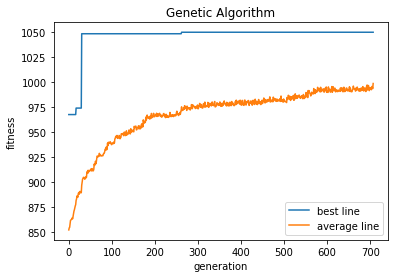

----------- 1 ------------
Chef Salad
#17 Jersey Mike's Famous Philly
Double Meat Whataburger Jr
fitness: 1050.0
----------- 2 ------------
Pepperoni Pizza, Skinny, Medium
#6 Roast Beef & Provolone on White Giant
Charbroiled BBQ Chicken Sandwich, Trim It
fitness: 1048.5
----------- 3 ------------
#56 Big Kahuna Cheese Steak, White Regular
Turkey & Bacon Guacamole, 6 in
#55 Big Kahuna Chicken Cheese Steak, Wheat Regular
fitness: 1033.5
----------- 4 ------------
Wildfire Chicken Salad, Low Calorie, Regular
#6 Roast Beef & Provolone, White Giant
Subway Club Salad
fitness: 1032.0
----------- 5 ------------
#6 Famous Roast Beef & Provolone on Tomato Wrap
#19 BBQ Beef on White Regular
No Yolk Egg Sandwich
fitness: 1028.0
----------- 6 ------------
#19 BBQ Beef on White Regular
#55 Big Kahuna Chicken Cheese Steak, Wheat Regular
Mushroom & Brie Bisque, 12 oz
fitness: 1023.0
----------- 7 ------------
Pastrami & Swiss, In a Tub
Pastrami & Swiss on White Giant
Chef Salad
fitness: 1019.5
-------

In [43]:
from random import random, randrange, shuffle
import pandas
import csv
from numpy import mean
import matplotlib.pyplot as plt
import math



def mutate(child):
    mutate1 = randrange(0,24) 
    mutate2 = randrange(0,24) 
    while mutate2 == mutate1:
        mutate2 = randrange(0,24)
    if mutate1 != 0:
        if child[mutate1] == "0":
            child = child[0:mutate1] + '1' + child[mutate1+1:]
        else:
            child = child[0:mutate1] + '0' + child[mutate1+1:]
    else:
        if child[mutate1] == "0":
            child = '1' + child[1:]
        else:
            child = '0' + child[1:]
    
    if mutate2 != 0:
        if child[mutate2] == "0":
            child = child[0:mutate2] + '1' + child[mutate2+1:]
        else:
            child = child[0:mutate2] + '0' + child[mutate2+1:]
    else:
        if child[mutate2] == "0":
            child = '1' + child[1:]
        else:
            child = '0' + child[1:]
    return child        

def crossover(chromosome):
    for i in range(30,len(chromosome),2):
        parent1 = chromosome[i].chromosome
        parent2 = chromosome[i+1].chromosome
#         print("parent 1 " + parent1)
#         print("parent 2 " + parent2)
        child1 = parent1[0:4] + parent2[4:8] + parent1[8:12] + parent2[12:16] + parent1[16:20] + parent2[20:24]
        child2 = parent2[0:4] + parent1[4:8] + parent2[8:12] + parent1[12:16] + parent2[16:20] + parent1[20:24]
#         print("child 1 " + child1)
#         print("child 2 " + child2)
        child1 = mutate(child1)
        child2 = mutate(child2)
#         print("child 1 after mutate " + child1)
#         print("child 2 after mutate " + child2)
        chromosome[i].chromosome = child1
        chromosome[i].chromosome = child2
    return chromosome
    
def create_chromosome(data, bestLn, avgLn) :
    class Chromosome():
        chromosome =''
        fitness = 0
    temp = Chromosome()
    best = 0
    chromosome = []
    sumFitness = 0
    for i in range(32):
        gene = str(randrange(0,2))
        for j in range(23):
            gene = gene + str(randrange(0,2))
        temp.chromosome = gene
        mealData1 = accessData(data ,temp.chromosome[0:8])
        mealData2 = accessData(data ,temp.chromosome[8:16])
        mealData3 = accessData(data ,temp.chromosome[16:])
        while not checkCons(mealData1, mealData2, mealData3):
            temp.chromosome = mutate(temp.chromosome)
            mealData1 = accessData(data ,temp.chromosome[0:8])
            mealData2 = accessData(data ,temp.chromosome[8:16])
            mealData3 = accessData(data ,temp.chromosome[16:])
        temp.fitness = fitnessFn(mealData1, mealData2, mealData3)
        sumFitness += temp.fitness
        if best < temp.fitness:
            best = temp.fitness   
        chromosome.append(temp)
        temp = Chromosome()
        gene = ''
    bestLn.append(best)
    avgLn.append(sumFitness/len(chromosome))
    return chromosome
        
def fitnessFn(meal1, meal2, meal3):
    totalProtein = meal1['protein'] + meal2['protein'] + meal3['protein']
    totalCalories = meal1['calories'] + meal2['calories'] + meal3['calories']
    return 0.5*totalProtein + 0.5*totalCalories
#     return 0.5*totalProtein 
    
def breeding(data, chromosome, badChromosome, bestLn, avgLn):
    sumFitness = 0
    best = 0
    chromosome = sorted(chromosome, key=lambda x: x.fitness, reverse=True)
    chromosome = crossover(chromosome)
    for cms in chromosome:
        while cms.chromosome in badChromosome:
            cms.chromosome = mutate(cms.chromosome)
            print('detect bad chr!')
        while cms.chromosome[0:8] == cms.chromosome[8:16] or cms.chromosome[0:8] == cms.chromosome[16:] or cms.chromosome[8:16] == cms.chromosome[16:]:
            cms.chromosome = mutate(cms.chromosome)
            print('same menu!')
        mealData1 = accessData(data ,cms.chromosome[0:8])
        mealData2 = accessData(data ,cms.chromosome[8:16])
        mealData3 = accessData(data ,cms.chromosome[16:])
        while not checkCons(mealData1, mealData2, mealData3):
            if cms.chromosome not in badChromosome:
                badChromosome.append(cms.chromosome) 
            cms.chromosome = mutate(cms.chromosome)
            mealData1 = accessData(data ,cms.chromosome[0:8])
            mealData2 = accessData(data ,cms.chromosome[8:16])
            mealData3 = accessData(data ,cms.chromosome[16:])
        cms.fitness = fitnessFn(mealData1, mealData2, mealData3)
        sumFitness += cms.fitness
        if best < cms.fitness:
            best = cms.fitness
    bestLn.append(best)
    avgLn.append(sumFitness/len(chromosome))
    print('best: ' + str(best))
    print('avg: ' + str(sumFitness/len(chromosome)))
    print('bad chromosome: ' + str(len(badChromosome)))
    print('-----------------------')
        

def checkCons(foodData1,foodData2,foodData3) :
    if(foodData1['sugar'] + foodData2['sugar'] + foodData3['sugar'] >= 24 and foodData1['sugar'] + foodData2['sugar'] + foodData3['sugar'] <= 50) :
        if(foodData1['protein'] + foodData2['protein'] + foodData3['protein'] >= 75 and foodData1['protein'] + foodData2['protein'] + foodData3['protein'] <= 175) :
            if(foodData1['calories'] + foodData2['calories'] + foodData3['calories'] >= 1500 and foodData1['calories'] + foodData2['calories'] + foodData3['calories'] <= 2500) :
                if(foodData1['carb'] + foodData2['carb'] + foodData3['carb']  >= 150 and foodData1['carb'] + foodData2['carb'] + foodData3['carb'] <= 200) :
                    if(foodData1['fat'] + foodData2['fat'] + foodData3['fat'] >= 50 and foodData1['fat'] + foodData2['fat'] + foodData3['fat'] <= 70) :
                        return True
    return False

def binToDec(binary):
    dec = 0
    for i in range(0, len(binary)):
        temp = int(binary[i])*(2**(len(binary)-i-1))
        dec += temp
    return dec


# input name of dataframe and 8-bit chromosome
def accessData(df, chromosome) :
    menuNumber = binToDec(chromosome)
    sugar = df.Sugar[menuNumber]
    protein = df.Protein[menuNumber]
    calories = df.Calories[menuNumber]
    carb = df.Carbohydrates[menuNumber]
    fat = df.Total_Fat[menuNumber]
    name = df.Item_Name[menuNumber]
    return {"name": name, "sugar": sugar, "protein": protein, "calories": calories, "carb": carb, "fat": fat}



chromosome = []
badChromosome = []
bestLn = []
avgLn = []
genNumber = list(range(1))
di = r"sampling_Filtered_Nutriton_Mk2_P8.csv"
article_read = pandas.read_csv(di, encoding='latin1')
# article_read = article_read.sort_values(['Protein','Calories'], ascending=[False,False])
chromosome = create_chromosome(article_read, bestLn, avgLn)
gen = 0
for i in genNumber:
    breeding(article_read, chromosome, badChromosome, bestLn, avgLn)
    gen = gen + 1
    if 0.05 * bestLn[-1] < abs(bestLn[-1] - avgLn[-1]):
        genNumber.append(i+1)
        print(genNumber[-1])
#     print(bestLn)
#     print(avgLn)
gen = gen + 1
genLn = list(range(0,gen))
plt.plot(genLn, bestLn, label = "best line") 
plt.plot(genLn, avgLn, label = "average line") 
plt.xlabel('generation') 
plt.ylabel('fitness') 
plt.title('Genetic Algorithm') 
plt.legend() 
plt.show() 
chromosome = sorted(chromosome, key=lambda x: x.fitness, reverse=True)
i = 1
for show in chromosome:
    firstMenu = accessData(article_read, show.chromosome[0:8])['name']
    secondMenu = accessData(article_read, show.chromosome[8:16])['name']
    thirdMenu = accessData(article_read, show.chromosome[16:])['name']
    print('----------- ' + str(i) + ' ------------')
    print(firstMenu)
    print(secondMenu)
    print(thirdMenu)
    print("fitness: " + str(show.fitness))
    i = i + 1






In [35]:
if 'a' not in ['b','c']:
    print('a')

a
